In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("D:\\Project\\New folder\\train.csv")

In [3]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [4]:
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
ID                      20972 non-null int64
TITLE                   20972 non-null object
ABSTRACT                20972 non-null object
Computer Science        20972 non-null int64
Physics                 20972 non-null int64
Mathematics             20972 non-null int64
Statistics              20972 non-null int64
Quantitative Biology    20972 non-null int64
Quantitative Finance    20972 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [6]:
df[["TITLE","ABSTRACT"]].describe()

,TITLE,ABSTRACT
count,20972,20972
unique,20972,20972
top,Superradiance phase transition in the presence...,"In this paper, we use the inverse mean curva..."
freq,1,1


In [7]:
df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df["sum"]=np.sum(df[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']],axis=1)

In [9]:
df['sum'].value_counts()

1    15928
2     4793
3      251
Name: sum, dtype: int64

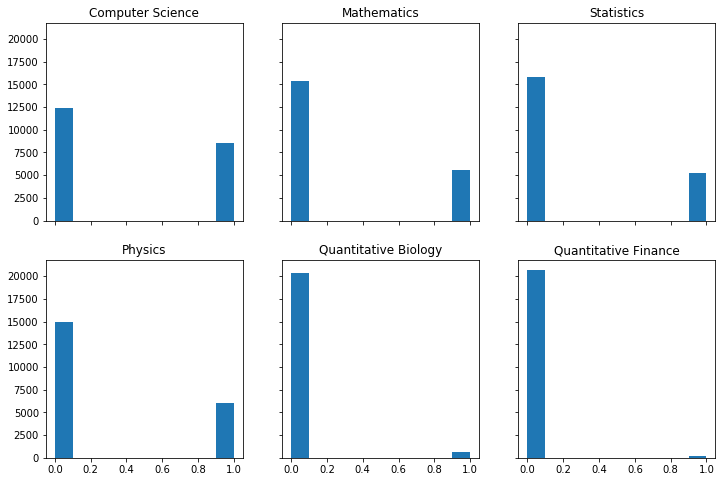

In [10]:
figure,axes=plt.subplots(2,3,sharey=True,sharex=True,figsize=(12,8))
axes[0][0].hist(df['Computer Science'])
axes[0][0].set_title('Computer Science')
axes[1][0].hist(df['Physics'])
axes[1][0].set_title('Physics')
axes[0][1].hist(df['Mathematics'])
axes[0][1].set_title('Mathematics')
axes[0][2].hist(df['Statistics'])
axes[0][2].set_title('Statistics')
axes[1][1].hist(df['Quantitative Biology'])
axes[1][1].set_title('Quantitative Biology')
axes[1][2].hist(df['Quantitative Finance'])
axes[1][2].set_title('Quantitative Finance')
plt.show()

In [11]:
df["len_title"]=df["TITLE"].apply(len)

In [12]:
df["len_ABSTRACT"]=df["ABSTRACT"].apply(len)

In [13]:
df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,sum,len_title,len_ABSTRACT
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873,1.252479,72.897721,1009.103376
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317,0.461173,26.128903,408.641363
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,7.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,714.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,71.000000,989.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,88.000000,1290.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,239.000000,2761.000000


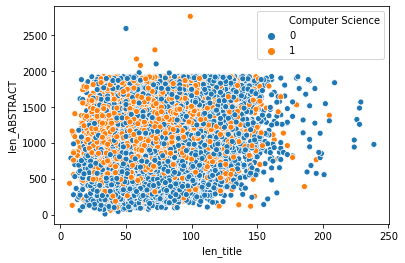

In [14]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Computer Science")

### there is a definitive pattern of lower title length and higher length of abstract fro computer science research

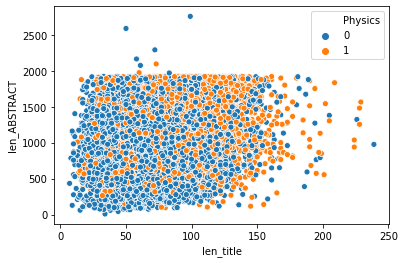

In [15]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Physics")

### there is a definitive pattern of higher title length and higher length of abstract for physics research

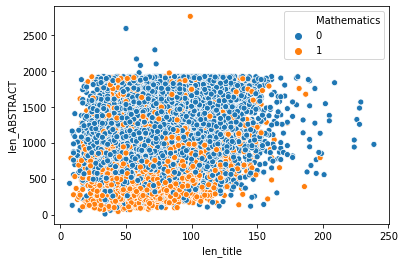

In [16]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Mathematics")

### there is a definitive pattern of lower title length and lower length of abstract for mathematics research

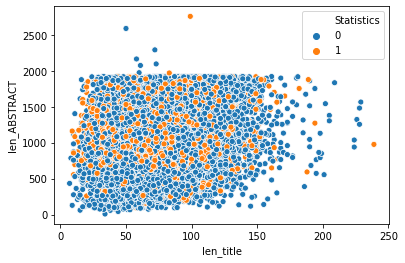

In [17]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Statistics")

### statistics research paper also shows a tendency of higher abstract length and lower title length. However, the data number is small. 

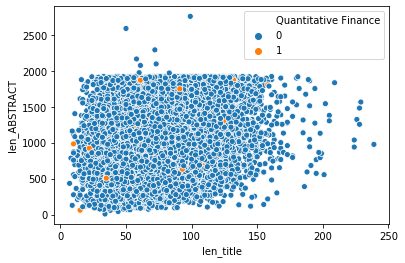

In [18]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Quantitative Finance")

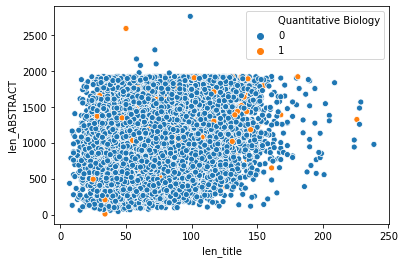

In [19]:
sns.scatterplot(x="len_title",y="len_ABSTRACT",data=df,hue="Quantitative Biology")

In [20]:
import string

In [21]:
from nltk.corpus import stopwords

In [22]:
def text_process(sent):
    no_punct=[char for char in sent if char not in string.punctuation]
    no_punct="".join(no_punct).split()
    no_space=[word for word in no_punct if word != " "]
    no_stopwords=[word for word in no_space if word not in stopwords.words("english")]
    return no_stopwords

In [23]:
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance', 'sum',
       'len_title', 'len_ABSTRACT'],
      dtype='object')

In [26]:
X=df[['TITLE', 'ABSTRACT']]

In [25]:
y=df[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [27]:
X["titl_abst"]=X["TITLE"]+["ABSTRACT"]

C:\Users\brvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
X["titl_abst"].head()

0    Reconstructing Subject-Specific Effect MapsABS...
1           Rotation Invariance Neural NetworkABSTRACT
2    Spherical polyharmonics and Poisson kernels fo...
3    A finite element approximation for the stochas...
4    Comparative study of Discrete Wavelet Transfor...
Name: titl_abst, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
bow_transformer=CountVectorizer(analyzer=text_process)

In [32]:
bow_transformer.fit(X["titl_abst"])

CountVectorizer(analyzer=<function text_process at 0x0000028E3BDA5168>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [33]:
print(bow_transformer.vocabulary_)

{'Reconstructing': 16597, 'SubjectSpecific': 19312, 'Effect': 6203, 'MapsABSTRACT': 11977, 'Rotation': 17238, 'Invariance': 10093, 'Neural': 13471, 'NetworkABSTRACT': 13453, 'Spherical': 18851, 'polyharmonics': 30685, 'Poisson': 15244, 'kernels': 27890, 'polyharmonic': 30684, 'functionsABSTRACT': 26496, 'A': 533, 'finite': 26179, 'element': 25511, 'approximation': 22574, 'stochastic': 33079, 'MaxwellLandauLifshitzGilbert': 12129, 'systemABSTRACT': 33512, 'Comparative': 3912, 'study': 33173, 'Discrete': 5655, 'Wavelet': 21634, 'Transforms': 20457, 'Tensor': 19930, 'Train': 20401, 'decomposition': 24686, 'feature': 26065, 'extraction': 25969, 'FTIR': 7069, 'data': 24622, 'medicinal': 28728, 'plantsABSTRACT': 30589, 'On': 14051, 'maximizing': 28665, 'fundamental': 26500, 'frequency': 26441, 'complement': 23948, 'obstacleABSTRACT': 29859, 'rotation': 31995, 'period': 30367, 'shape': 32410, 'hyperbolic': 27163, 'asteroid': 22686, '1IOumuamua': 152, '2017': 206, 'U1': 20770, 'lightcurveABSTR

In [35]:
X=bow_transformer.transform(X["titl_abst"])

In [45]:
X.shape

(20972, 35032)

In [44]:
type(X)

scipy.sparse.csr.csr_matrix

# X=pd.concat(X,df[['len_title','len_ABSTRACT']])
### I really want to use the length feature along with the nlp feature. however, i am not able to do the same.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfclassifier=RandomForestClassifier(n_estimators=200)

In [55]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
prediction=rfclassifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
from sklearn.metrics import multilabel_confusion_matrix

In [61]:
print(multilabel_confusion_matrix(y_test,prediction))

[[[3012  745]
  [ 694 1841]]

 [[3950  493]
  [ 644 1205]]

 [[4348  233]
  [ 881  830]]

 [[4426  312]
  [ 775  779]]

 [[6098    0]
  [ 192    2]]

 [[6225    0]
  [  67    0]]]


In [58]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2535
           1       0.71      0.65      0.68      1849
           2       0.78      0.49      0.60      1711
           3       0.71      0.50      0.59      1554
           4       1.00      0.01      0.02       194
           5       0.00      0.00      0.00        67

   micro avg       0.72      0.59      0.65      7910
   macro avg       0.65      0.40      0.43      7910
weighted avg       0.73      0.59      0.63      7910
 samples avg       0.64      0.62      0.61      7910



C:\Users\brvis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brvis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


### The model prediction is satisfactory. lets run the model in other classification alogorithms and then we will select a final one

In [132]:
rfclassifier_new=RandomForestClassifier(n_estimators=200)

In [70]:
rfclassifier_new.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
test=pd.read_csv("D:\\Project\\New folder\\test_8iecVfC\\test.csv")

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
ID          8989 non-null int64
TITLE       8989 non-null object
ABSTRACT    8989 non-null object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


In [74]:
test["titl_abst"]=test["TITLE"]+test["ABSTRACT"]

In [76]:
test_X=bow_transformer.transform(test["titl_abst"])

In [77]:
predictions_final=rfclassifier_new.predict(test_X)

In [81]:
test

,ID,TITLE,ABSTRACT,titl_abst
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs Fr...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...
...,...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,Supporting mixed-datatype matrix multiplicatio...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,An axiomatic basis for Blackwell optimality I...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,GeneVis - An interactive visualization tool fo...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...,Quantifying the causal effect of speed cameras...


In [82]:
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance', 'sum',
       'len_title', 'len_ABSTRACT'],
      dtype='object')

In [84]:
final_submission=pd.DataFrame(predictions_final,columns=['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'])

In [87]:
final_submission=pd.concat([test["ID"],final_submission],axis=1)

In [91]:
final_submission.set_index("ID",inplace=True)

In [92]:
final_submission.to_csv("D:\\Project\\New folder\\submission_RF.csv")

### Lets try using the TF-IDF transformer

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer

In [98]:
tf_idf=TfidfTransformer()

In [99]:
tf_idf.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [100]:
X_tf_idf=tf_idf.transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.30, random_state=42)

In [102]:
rfclassifier_tf=RandomForestClassifier(n_estimators=200)

In [103]:
rfclassifier_tf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
predictions_tf=rfclassifier_tf.predict(X_test)

In [105]:
print(classification_report(y_test,predictions_tf))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      2535
           1       0.67      0.71      0.69      1849
           2       0.79      0.47      0.59      1711
           3       0.73      0.48      0.58      1554
           4       0.67      0.01      0.02       194
           5       0.33      0.01      0.03        67

   micro avg       0.72      0.58      0.65      7910
   macro avg       0.66      0.39      0.44      7910
weighted avg       0.73      0.58      0.63      7910
 samples avg       0.64      0.61      0.61      7910



C:\Users\brvis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


### the results are better than when TF-IDF is not used. lets run the model on the full data and use the provided test data

In [106]:
rfclassifier_tf_new=RandomForestClassifier(n_estimators=200)

In [107]:
rfclassifier_tf_new.fit(X_tf_idf,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
test=pd.read_csv("D:\\Project\\New folder\\test_8iecVfC\\test.csv")

In [122]:
test["titl_abst"]=test["TITLE"]+test["ABSTRACT"]

In [123]:
test_transform=bow_transformer.transform(test["titl_abst"])

In [124]:
test_transform=tf_idf.transform(test_transform)

In [125]:
predictions_tfidf_new=rfclassifier_tf_new.predict(test_transform)

In [126]:
final_submission_tfidf=pd.DataFrame(predictions_tfidf_new,columns=['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'])

In [127]:
final_submission_tfidf=pd.concat([test["ID"],final_submission_tfidf],axis=1)

In [128]:
final_submission_tfidf.set_index("ID",inplace=True)

In [131]:
final_submission_tfidf.to_csv("D:\\Project\\New folder\\submission_RF_tfidf.csv")

In [130]:
final_submission_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8989 entries, 20973 to 29961
Data columns (total 6 columns):
Computer Science        8989 non-null int64
Physics                 8989 non-null int64
Mathematics             8989 non-null int64
Statistics              8989 non-null int64
Quantitative Biology    8989 non-null int64
Quantitative Finance    8989 non-null int64
dtypes: int64(6)
memory usage: 491.6 KB


### USING ANN

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
ann_model=Sequential()

In [ ]:
model.add(Dense)